In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
weather_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


- Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.

In [55]:
X = weather_df[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]
Y = weather_df["Temperature (C)"]
lrm = LinearRegression()
lrm.fit(X, Y)

x = sm.add_constant(X)
results = sm.OLS(Y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:35:23   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Şimdi, modelinizin yukarıdaki Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.

In [59]:
tahmin = lrm.predict(X)
hatalar = Y - tahmin

print("Tıbbi maliyetler modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))

Tıbbi maliyetler modelinin ortalama hatası : 0.000000000000001


The mean of errors is close to zero so there is no problem with that rule.

In [60]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 2464.84 ve p değeri : 0.000000000000000000000
Levene test değeri   : 2321.24 ve p değeri : 0.000000000000000000000


Our model is heteroscedasticity. It does not satisfy Gauus' homoscedasticity rule.

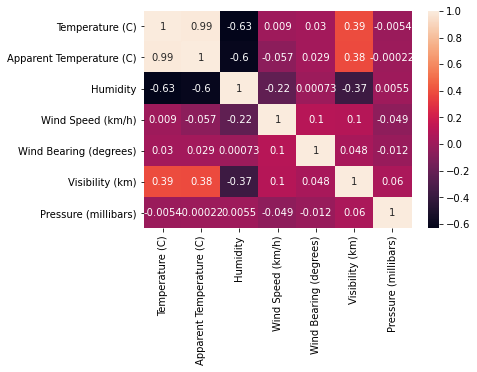

In [69]:
sns.heatmap(weather_df.drop(["Loud Cover"],axis=1).corr(),annot=True);

As can be seen from the correlation matrix, there does not seem to be a case of multicollinearity.

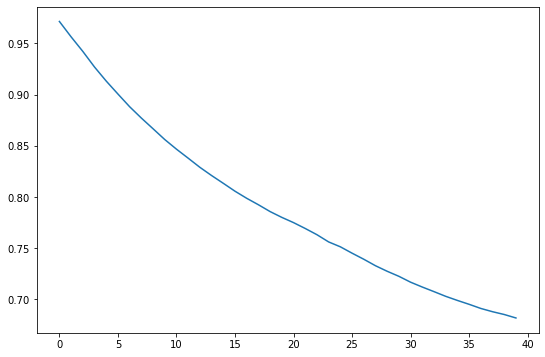

In [75]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

The error terms have a very high correlation to each other, so it doesn't satisfy this rule either.

In [79]:
df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
dummies = pd.get_dummies(df[["SaleType","Street"]],drop_first=True)
X = pd.concat([df["FullBath"],dummies],axis=1,ignore_index=False)
Y = df["SalePrice"]

- Önceki derste oluşturduğunuz modeli yeniden gerçekleştirin.

In [90]:
lrm = LinearRegression()
lrm.fit(X, Y)

x = sm.add_constant(X)
results = sm.OLS(Y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     86.33
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          1.99e-139
Time:                        17:20:54   Log-Likelihood:                -18203.
No. Observations:                1460   AIC:                         3.643e+04
Df Residuals:                    1449   BIC:                         3.649e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.077e+04    2.8e+04      1.101      0.271   -2.41e+04    8.56e+04
FullBath        7.217e+04   3095.223     23.318      0.000    6.61e+04    7.82e+04
SaleType_CWD    4.103e+04    3.3e+04      1.243      0.214   -2.37e+04    1.06e+05
SaleType_Con    1.181e+05   4.56e+04      2.587      0.010    2.85e+04    2.08e+05
SaleType_ConLD -7347.2825   2.33e+04     -0.315      0.753   -5.31e+04    3.84e+04
SaleType_ConLI  4.165e+04   2.98e+04      1.396      0.163   -1.69e+04       1e+05
SaleType_ConLw  -608.9474   2.98e+04     -0.020      0.984   -5.91e+04    5.79e+04
SaleType_New    8.733e+04   1.13e+04      7.697      0.000    6.51e+04     1.1e+05
SaleType_Oth   -1.965e+04   3.77e+04     -0.521      0.602   -9.36e+04    5.43e+04
SaleType_WD     1.973e+04   9794.824      2.015      0.044     518.159    3.89e+04
Street_Pave      1.25e+04   2.61e+04      0.479      0.632   -3.86e+04    6.36e+04
==============================================================================
Omnibus:                      567.515   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3827.742
Skew:                           1.657   Prob(JB):                         0.00
Kurtosis:                      10.207   Cond. No.                         65.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Yukarıdaki tüm varsayımları kontrol edin ve bazı varsayımların karşılanmadığı durumlarda sonuçları tartışın.

In [91]:
tahmin = lrm.predict(X)
hatalar = Y - tahmin

print("Tıbbi maliyetler modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))

Tıbbi maliyetler modelinin ortalama hatası : 0.000000000034207


The mean of errors is close to zero so there is no problem with that rule.

In [92]:
bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 96.7001 ve p değeri : 0.000000000000000000000
Levene test değeri   : 2.86637 ve p değeri : 0.090555312144428939947


Homoscedastic according to Levene's test, heteroscedastic according to Barlett's test.

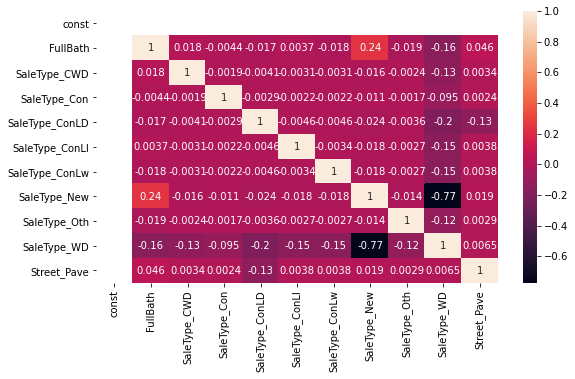

In [95]:
plt.figure(figsize=(9,5))
sns.heatmap(X.corr(),annot=True);

With the value of -0.77, the two variables have a strong negative relationship with each other.

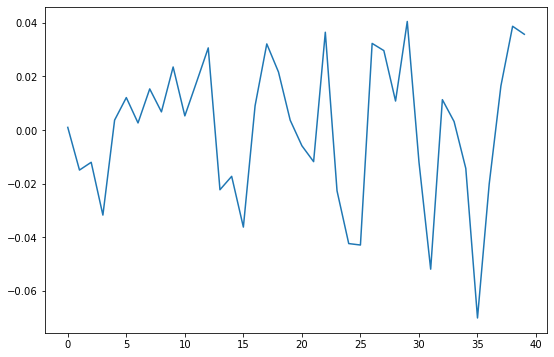

In [97]:
acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

The autocorrelation between the errors of our model is indeed very low (between -0.06 and 0.05) so it satisfy this rule.